# Bias-Variance Trade-Off

## Irreducible Error
- Data-generating processes are noisy
- Noise is by definition random(not deterministic)
- Can't predict its values, only its statistics(like mean & variance)
- Example:
- we are in charge of the data-generating process
- f(x) = 2x +1 
- linear regression
- If a machine learning guy is working on our data, we can give him this function, his work is done
- but linear regression model is: y = ax+b + $\epsilon$
- $\epsilon \sim N(0,\sigma^2)$ 
- $\hat{f}(x)$ = 2x + 1 doesn't achieve 0 error on y = 2x +1+ $\epsilon$

## Bias 
- Bias here refers to the delta between your average model and the true f(x)
- some sources refer to the square of this as bias, we won't
$$
bias = E[f(x) - \hat{f}(x)]
$$

## Variance
- Variance from statistics = how much a random variable deviates from its mean in squared units
- Variance in the context of bias-variance trade-off is more specific
- Variance = statistical variance of predictor over all possible training sets
- Suppose we have a model that overfits- gets perfect for any training set
- Then the models for each training set are probably very different from each other
- Has nothing to do with accuracy
- variance just measures how inconsistent a predictor is, over different training sets
- remember: goal is not to achieve lowest possible error
- goal is to find true f(x)
- being close to training points is only a proxy solution

## Model Complexity
- Variance is a proxy for model complexity
- Complexity is a malleable term
- can mean different things for different classifiers
- ex. deep learning tree = complex, shallow decision tree = not complex
- ex.K-nearest neighbor: K = 1complex, K =50 = not complex

## Bias-Variance Trade-Off
- In ML we strive to minimize error
- Overall error is a combination of
    - Bias
    - Variance
    - Irreducible error
- Goal is then to make bias and variance as small as possible
- It's a tradeoff
- we need to balance these
- when we lower one, the other increases
- Overfit: bias goes down, variance goes up
- Underfit: bias goes up, variance goes down

![](https://cn.bing.com/th?id=OIP.XRW2556DfOJz2EIz31RoOwHaFu&pid=Api&w=1056&h=816&rs=1)
![](https://cn.bing.com/th?id=OIP.-pwwSpcPJcxzDaRH40w95QAAAA&pid=Api&rs=1)

## Bias -Variance Decomposition
- Expected error = $bias^2$ + variance + irreducible error
- Use mean-squared error for derivation for both regression and classification



## Definition


$$
y = f(x) + \epsilon\\
\epsilon \sim N(0,\sigma^2)\\
\hat{f(x)} = \text{estimate of }f(x)\\
err = E[(y-\hat{f(x)})^2]\\
\bar{f(x)} = E[\hat{f(x)}]\\
= E[(f(x)+\epsilon -\hat{f(x)}+\bar{f(x)}-\bar{f(x)})^2]\\
= E[\epsilon^2]+E[\epsilon(f(x)-\bar{f(x)} - (\hat{f(x)}-\bar{f(x)}) )]\\
E[\epsilon] = 0\\
E[\epsilon^2] = \sigma_{\epsilon}^2+(E[\epsilon])^2 = \sigma_{\epsilon}^2\\
E[\hat{f(x)} - \bar{f(x)}] = E[\hat{f(x)}] - E[\hat{f(x)}] = 0\\
= [f(x) - \bar{f(x)}]^2 + E[(\hat{f(x)} - \bar{f(x)})^2]+E[\epsilon^2]\\
= bias^2 + variance + \sigma_{\epsilon}^2
$$

## Summary
- expected error is a combination of bias,variance, and irreducible error
- this is not just the error between the true f(x) and f_hat(x)
- we never observe f(x), we can only observe y

## In Code

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

NUM_DATASETS = 50
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
Ntrain = int(0.9*N)

np.random.seed(2)
```

```python
# make a dataset with x^D, x^(D-1), ..., x^0
def make_poly(x, D):
    N = len(x)
    X = np.empty((N, D+1))
    for d in range(D+1):
        X[:,d] = x**d
        print("x[:,d] {}".format(X[:,d].shape))
        print("x {} X[:,d] {}".format(x,X[:,d]))
        if d > 1:
            X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
    return X
```

```python
X = np.linspace(-np.pi, np.pi, N)
X
Xpoly = make_poly(X, MAX_POLY)

array([-3.14159265, -2.87979327, -2.61799388, -2.35619449, -2.0943951 ,
       -1.83259571, -1.57079633, -1.30899694, -1.04719755, -0.78539816,
       -0.52359878, -0.26179939,  0.        ,  0.26179939,  0.52359878,
        0.78539816,  1.04719755,  1.30899694,  1.57079633,  1.83259571,
        2.0943951 ,  2.35619449,  2.61799388,  2.87979327,  3.14159265])
```

```python
Xpoly.shape
(25,13)
```


```python

def f(X):
    return np.sin(X)


x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

((100,), (100,))
```

```python
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
# squared_biases = np.zeros((NUM_DATASETS, MAX_POLY))
# test_predictions = np.zeros((N - Ntrain, NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

train_scores.shape,train_predictions.shape
((50, 12), (22, 50, 12))
```

```python
# create the model
model = LinearRegression()

for k in range(NUM_DATASETS):
  Y = f_X + np.random.randn(N)*NOISE_VARIANCE

  Xtrain = Xpoly[:Ntrain]
  Ytrain = Y[:Ntrain]

  Xtest = Xpoly[Ntrain:]
  Ytest = Y[Ntrain:]

  for d in range(MAX_POLY):
    model.fit(Xtrain[:,:d+2], Ytrain)
    predictions = model.predict(Xpoly[:,:d+2])

    # debug
    x_axis_poly = make_poly(x_axis, d+1)
    prediction_axis = model.predict(x_axis_poly)
    # plt.plot(x_axis, prediction_axis)
    # plt.show()

    prediction_curves[:,k,d] = prediction_axis

    train_prediction = predictions[:Ntrain]
    test_prediction = predictions[Ntrain:]

    train_predictions[:,k,d] = train_prediction # use this to calculate bias/variance later

    train_score = mse(train_prediction, Ytrain)
    test_score = mse(test_prediction, Ytest)

    train_scores[k,d] = train_score
    test_scores[k,d] = test_score
```

$$
= [f(x) - \bar{f(x)}]^2 + E[(\hat{f(x)} - \bar{f(x)})^2]+E[\epsilon^2]\\
= bias^2 + variance + \sigma_{\epsilon}^2
$$


```python

# calculate the squared bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
  for i in range(Ntrain):
    avg_train_prediction[i,d] = train_predictions[i,:,d].mean()
  squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()

# calculate the variance
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
  for i in range(Ntrain):
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / N
variance = variances.mean(axis=0)
```

# K-nearest Neighbor and Decision Tree

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.utils import shuffle


In [2]:
N = 20
Ntrain = 12

# create the data
X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
Y = np.sin(3*X)
X, Y = shuffle(X, Y)

Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]


In [5]:
X.shape

(20, 1)

In [6]:
# decision tree - low bias, high variance
model = DecisionTreeRegressor() # default max_depth=None
model.fit(Xtrain, Ytrain)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [3]:
T = 50
Xaxis = np.linspace(0, 2*np.pi, T)
Yaxis = np.sin(3*Xaxis)


In [11]:
Xaxis.shape

(50,)

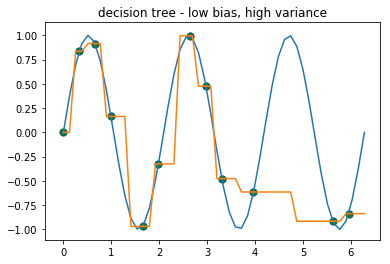

In [14]:
%matplotlib inline
plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.title("decision tree - low bias, high variance")
# plt.show()
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.show()



In [4]:
# decision tree - high bias, low variance
model = DecisionTreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)



DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

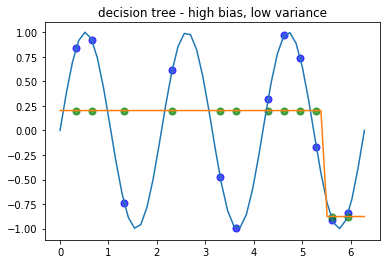

In [5]:
plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("decision tree - high bias, low variance")
plt.show()


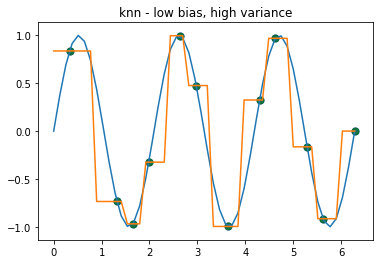

In [4]:

# knn - low bias, high variance
model = KNeighborsRegressor(n_neighbors=1)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - low bias, high variance")
plt.show()



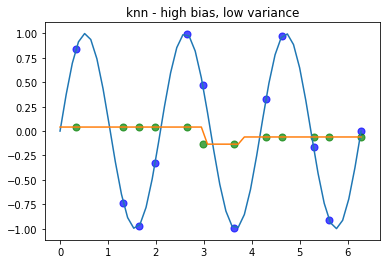

In [5]:

# knn - high bias, low variance
model = KNeighborsRegressor(n_neighbors=10)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - high bias, low variance")
plt.show()


# Cross-Validation as a Method for Optimizing model complexity

## Cross-Validation
- Cross-Validation can help up optimizing the bias-variance trade-off
- we've already looked at cross-validation as a way of choosing hyperparamters
- Motivation: we didn't just want good training error, we wanted good generalization error too
- In polynomial regression example, we saw that test error coincides with sum of $bias^2$+variance
- so by optimizing test error, we optimize bias -variance as well

- before: used cross-validation to find best hyperparameters
- Now: use cross-validation to find best model complexity(which is actually just choosing hyperparameters)
- Before: used cross-validation to optimize generalization error
- Now: use cross-validation to optimize bias^2 + variance (correspons to generalization error)
- just a slightly different perspective, we are still doing the same thing

## K-Fold Cross-Validation
- popular way to choose hyperparameters
- split data into K parts(typical values for K = 3,5,10)
- Loop K times
- In each iteration, take 1 part out(use it for validation), use the rest for training
- Ex. for K = 3


|[]()| []() | []()| []()|
|--|--|--|--|
|Iteration 1| validation | training| training|
|Iteration 2| training | validation| training|
|Iteration 3| training | training| validation|



```python
scores = []
sz = N/K
for i in xrange(K):
    Xvalid,Yvalid = X[i*sz: (i+1)*sz],Y[i*sz: (i+1)*sz]
    Xtrain,Ytrain = concat(X[0: (i)*sz],X[(i+1)*sz: N]),concat(Y[0: (i)*sz],Y[(i+1)*sz: N])
    model.fit(Xtrain,Ytrain)
    scores.append(model.score(Xvalid,Yvalid))
return scores

```

- Return K different scores(accuracies)
- Can simply use the mean
- Can also use statistical testing to check if one hyperparameter setting is statistically significantly better than another

## Sci-kit learn

```python
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model,X,Y,cv=K)
```

- SKLearn version requires you to conform to their API
- fit(),predict() and score() function + more
